### 평가 - MNIST 손글씨 사례

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

- 데이터 탐색

In [3]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
digits.target[0]

0

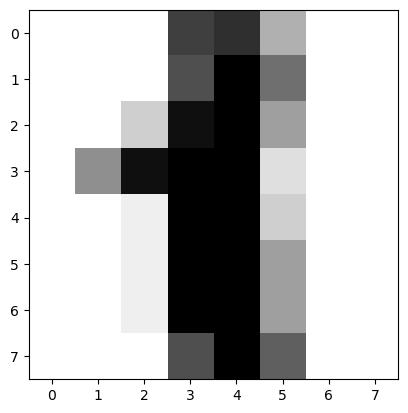

In [10]:
plt.imshow(digits.images[1], cmap=plt.cm.binary, interpolation='nearest');

In [11]:
digits.data.max(), digits.data.min()

(16.0, 0.0)

- Is it seven?

In [17]:
X = digits.data
y = digits.target == 7

In [19]:
y = (digits.target == 7).astype(int)
y[:5]

array([0, 0, 0, 0, 0])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=2023
)

In [22]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([1213,  134], dtype=int64))
(array([0, 1]), array([405,  45], dtype=int64))


- SVM (Support Vector Machine)으로 분류

In [24]:
from sklearn.svm import SVC
svc = SVC(random_state=2023)
svc.fit(X_train, y_train)
pred_sv = svc.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_sv)

0.9977777777777778

- 엉터리 분류기: 무조건 0을 반환

In [26]:
from sklearn.base import BaseEstimator

class MyClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X):
        return np.zeros(X.shape[0], int)

In [28]:
my_clf = MyClassifier()
my_clf.fit(X_train, y_train)
pred_my = my_clf.predict(X_test)
accuracy_score(y_test, pred_my)

0.9

- 평가

In [30]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

confusion_matrix(y_test, pred_sv), confusion_matrix(y_test, pred_my)

(array([[405,   0],
        [  1,  44]], dtype=int64),
 array([[405,   0],
        [ 45,   0]], dtype=int64))

In [31]:
precision_score(y_test, pred_sv), precision_score(y_test, pred_my)

c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(1.0, 0.0)

In [32]:
recall_score(y_test, pred_sv), recall_score(y_test, pred_my)

(0.9777777777777777, 0.0)